In [ ]:
#pip install kaggle pandas numpy seaborn matplotlib scikit-learn nltk gensim transformers torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
!pip install -q kaggle nltk gensim transformers scikit-learn seaborn wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 62.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
!pip install wandb

In [32]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec, FastText
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
from torch.utils.data import Dataset
import torch

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
os.environ["WANDB_DISABLED"] = "true"


In [34]:
import kagglehub

os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
#!kaggle datasets download -d crowdflower/twitter-airline-sentiment --unzip

path = kagglehub.dataset_download('crowdflower/twitter-airline-sentiment')

df = pd.read_csv("Tweets.csv")


In [35]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [37]:
df = df[['text', 'airline_sentiment', 'airline_sentiment_confidence']]   #I can delete the third column

In [38]:
df.rename(columns={'text': 'tweet', 'airline_sentiment': 'label', 'airline_sentiment_confidence': 'confidence'}, inplace=True)

def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text) #removing urls
    text = re.sub(r'@\w+|\#','', text) #removing mentions and hashtags
    text = re.sub(r"[^a-zA-Z\s]", '', text) #removing punctuation and special chars (sadece letter ve space kalıyor)
    text = " ".join([word for word in text.split() if word not in stop_words]) #removing stopwords

    '''
    words= word_tokenize(text) #tokenizing the text into individual words

    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words] #it keeps the word if it's not found in the stopword list, it skips if found

    #lemmatization reduces words to their base or dictionary form
    words = [lemmatizer.lemmatize(word) for word in words]

    return ''.join(words)
    '''
    return text

df['clean_tweet'] = df['tweet'].apply(preprocess)

<ipython-input-38-201f774e75c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'text': 'tweet', 'airline_sentiment': 'label', 'airline_sentiment_confidence': 'confidence'}, inplace=True)


In [ ]:
'''
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from wordcloud import STOPWORDS

import spacy
from spacy.lang.en.stop_words import STOP_WORDS

#spaCy model
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

stop = STOP_WORDS

#preprocess text using spaCy
def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop and not token.is_punct]
    return ' '.join(tokens)

df['processed_text'] = train_df['clean_text'].apply(preprocess_text)

'''


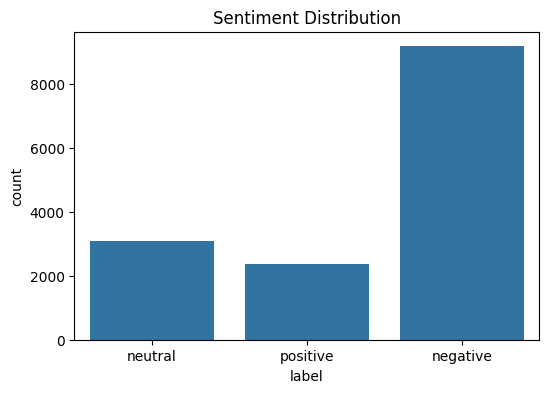

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df)
plt.title("Sentiment Distribution")
plt.show()



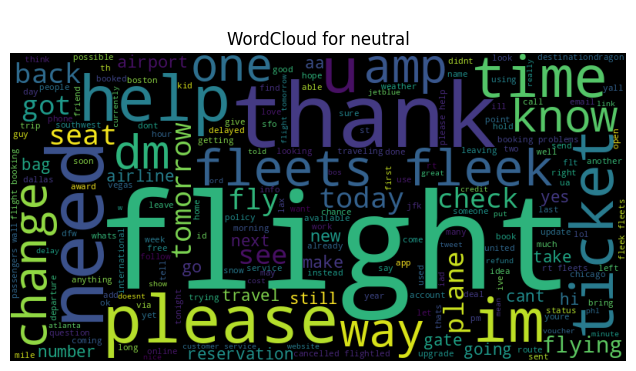

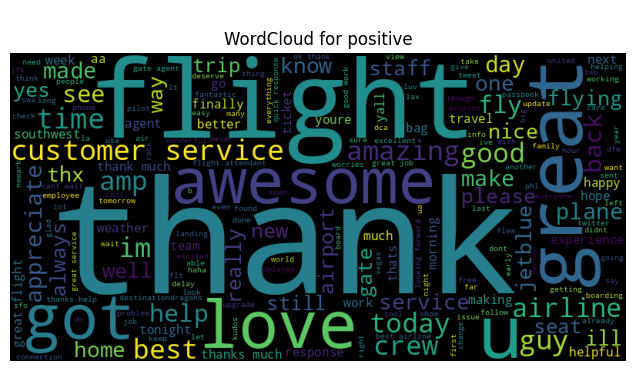

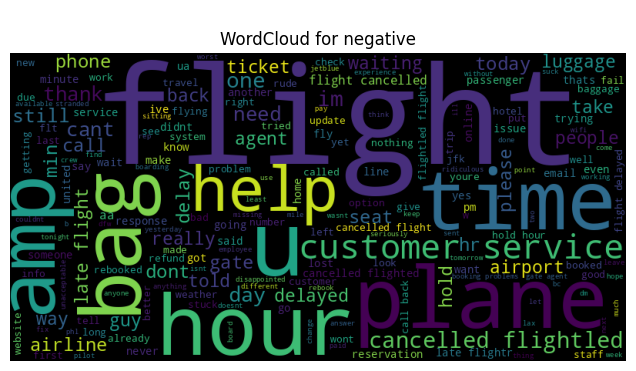

In [30]:
for sentiment in df.label.unique():
    wc = WordCloud(width=800, height=400).generate(" ".join(df[df.label==sentiment]['clean_tweet']))
    plt.figure(figsize=(10,4))
    plt.imshow(wc)
    plt.title(f"\nWordCloud for {sentiment}")
    plt.axis("off")
    plt.show()

In [40]:
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

Feature Extraction


In [41]:
'''
TF-IDF converts text data into numerical features based on
the importance of each word within the document compared to its frequency across all documents
'''

tfidf = TfidfVectorizer(max_features=5000)
#X_tfidf = tfidf.fit_transform(df['clean_tweet']).toarray() #transforms the text data into a tf-idf matrix
X_tfidf = tfidf.fit_transform(df['clean_tweet'])

scaler= StandardScaler() #normalizes the column: mean=0, std dev=1
X_conf_scaled = scaler.fit_transform(df[['confidence']])
X_combined=hstack([X_tfidf, X_conf_scaled]) #horizontally stacks the features and normalized column


y = df['label']  #target variable


#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42) #without the third column
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, stratify=y, random_state=42)


'''
#Balancing the dataset bc there were too many negatives
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
'''

#trains the model and predicts sentiment labels on test data
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
#lr.fit(X_train_smote, y_train_smote)
preds = lr.predict(X_test)

print("TF-IDF + Logistic Regression Accuracy:", accuracy_score(y_test, preds))


TF-IDF + Logistic Regression Accuracy: 0.7790300546448088


In [42]:
#Word embeddings are vector representations of words
#converts words into numerical vectors based on context and usage

tokenized = [text.split() for text in df['clean_tweet']]  #tokenizes (coverts to subwords) each tweet into words
w2v = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=2)

#getting the average vector for a text
def get_avg_vector(text, model):
    vectors = [model.wv[word] for word in text.split() if word in model.wv]  #getting the word vectors for each word in the text
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size) #returns avg

#convert each tweet into an avg vector
X_w2v = np.array([get_avg_vector(text, w2v) for text in df['clean_tweet']])
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.2, stratify=y, random_state=42)


#Balancing
#X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [43]:
#training logistic reg on word2vec features
lr.fit(X_train, y_train)
#lr.fit(X_train_smote, y_train_smote)

preds = lr.predict(X_test)
print("Word2Vec + Logistic Regression Accuracy:", accuracy_score(y_test, preds))


Word2Vec + Logistic Regression Accuracy: 0.692964480874317


In [44]:
fasttext = FastText(sentences=tokenized, vector_size=100, window=5, min_count=2)
X_fast = np.array([get_avg_vector(text, fasttext) for text in df['clean_tweet']])  #avg vectors
X_train, X_test, y_train, y_test = train_test_split(X_fast, y, test_size=0.2, stratify=y, random_state=42)

'''
#Balancing
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

lr.fit(X_train_smote, y_train_smote)
'''

#training log reg on fasttext
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
print("FastText + Logistic Regression Accuracy:", accuracy_score(y_test, preds))


FastText + Logistic Regression Accuracy: 0.6782786885245902


In [45]:
#encoding categorical labels into int

label_dict = {'negative': 0, 'neutral': 1, 'positive': 2}
df['label_id'] = df['label'].map(label_dict)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

#for BERT input format
class TweetDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenizer(list(texts), truncation=True, padding=True, max_length=128)
        self.labels = labels

    def __len__(self): return len(self.labels)
    def __getitem__(self, idx):
        #returns the input text and corresponding label as tensors
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item


In [46]:
#splitting for bert
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['label_id'], test_size=0.2, stratify=df['label_id'], random_state=42)
train_dataset = TweetDataset(X_train.tolist(), y_train.tolist())
test_dataset = TweetDataset(X_test.tolist(), y_test.tolist())

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=50, #num of warmup steps for learning rate
    eval_strategy="epoch", #after every epoch
    logging_dir='./logs',
    logging_steps=10,
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy", #selects the best model according to accuracy
    report_to="none" #for wandb

)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [47]:
#evaluation of metrics like accuracy during training
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)  #gets predicted class by finding max logit
    return {"accuracy": accuracy_score(labels, preds)}


#for fine-tuning
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()
results = trainer.evaluate()
print("BERT Accuracy:", results['eval_accuracy'])


Epoch,Training Loss,Validation Loss,Accuracy
1,0.416400,0.426488,0.839139
2,0.229900,0.481699,0.844262


BERT Accuracy: 0.8442622950819673


In [48]:
#Mapping integers back to class labels for prediction
class_names = ['negative', 'neutral', 'positive']

def predict_sentiment(text):
    model.eval() #eval mode

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    #tokenizing the input text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    inputs = {key: val.to(device) for key, val in inputs.items()} #moving the inputs to correct device

    #Getting the model's prediction without gradients for efficiency
    with torch.no_grad():
        outputs = model(**inputs) #forwards pass through the model
        logits = outputs.logits #gets the raw logits from the model
        probs = torch.nn.functional.softmax(logits, dim=1) #cınverts logits into probs
        predicted_class_id = logits.argmax().item()  #gets the index of the max logit
        confidence = probs[0][predicted_class_id].item()  #gets the confidence


    return class_names[predicted_class_id], confidence


In [49]:
print("Enter text (type 'exit' to stop):")
while True:
    user_input = input()
    if user_input.lower() == 'exit':
        break
    label, confidence = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {label} (Confidence: {confidence:.2f})")


Enter text (type 'exit' to stop):
I had the worst experience flying with this airline. The flight was delayed for hours, and the staff was incredibly rude to me and the other passengers. I will never fly with them again!
Predicted Sentiment: negative (Confidence: 1.00)
The airport was in the city center and it has round walls
Predicted Sentiment: neutral (Confidence: 0.57)
I loved the service, staff were friendly and food was good
Predicted Sentiment: positive (Confidence: 1.00)
exit


In [19]:
'''
print("Enter text (type 'exit' to stop):")
while True:
    user_input = input(">> ")
    if user_input.lower() == 'exit':
        break
    label, confidence = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {label} (Confidence: {confidence:.2f})")
'''

Enter text (type 'exit' to stop):
>> I had the worst experience flying with this airline. The flight was delayed for hours, and the staff was incredibly rude to me and the other passengers. I will never fly with them again!
Predicted Sentiment: negative (Confidence: 1.00)
>> The flight was on time and the cabin crew was friendly, but nothing about the experience stood out. It was just an average flight with no major issues or highlights
Predicted Sentiment: negative (Confidence: 0.52)
>> My journey was neither great nor terrible. The seats were fine, the food was decent, and the staff did their job, but there was nothing memorable about the trip.
Predicted Sentiment: negative (Confidence: 0.68)
>> This airline is fantastic! The crew was so friendly, the seats were comfortable, and the food was delicious. I had a wonderful flight, and I will definitely choose them again in the future.
Predicted Sentiment: positive (Confidence: 0.99)
>> I had an amazing experience with this airline. Ever

In [ ]:
'''
print("Enter text (type 'exit' to stop):")
while True:
    user_input = input(">> ")
    if user_input.lower() == 'exit':
        break
    label, confidence = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {label} (Confidence: {confidence:.2f})")


Enter text (type 'exit' to stop):
>> I had the worst experience flying with this airline. The flight was delayed for hours, and the staff was incredibly rude to me and the other passengers. I will never fly with them again!
Predicted Sentiment: negative (Confidence: 1.00)
>> The flight was on time and the cabin crew was friendly, but nothing about the experience stood out. It was just an average flight with no major issues or highlights
Predicted Sentiment: negative (Confidence: 0.83)
>> My journey was neither great nor terrible. The seats were fine, the food was decent, and the staff did their job, but there was nothing memorable about the trip.
Predicted Sentiment: positive (Confidence: 0.67)
>> This airline is fantastic! The crew was so friendly, the seats were comfortable, and the food was delicious. I had a wonderful flight, and I will definitely choose them again in the future.
Predicted Sentiment: positive (Confidence: 0.99)
>> I had an amazing experience with this airline. Ever

In [ ]:
'''
print("Enter text (type 'exit' to stop):")
while True:
    user_input = input(">> ")
    if user_input.lower() == 'exit':
        break
    label, confidence = predict_sentiment(user_input)
    print(f"Predicted Sentiment: {label} (Confidence: {confidence:.2f})")


Enter text (type 'exit' to stop):
>> I had the worst experience flying with this airline. The flight was delayed for hours, and the staff was incredibly rude to me and the other passengers. I will never fly with them again!
Predicted Sentiment: negative (Confidence: 1.00)
>> The flight was on time and the cabin crew was friendly, but nothing about the experience stood out. It was just an average flight with no major issues or highlights
Predicted Sentiment: positive (Confidence: 0.51)
>> My journey was neither great nor terrible. The seats were fine, the food was decent, and the staff did their job, but there was nothing memorable about the trip.
Predicted Sentiment: negative (Confidence: 0.67)
>> This airline is fantastic! The crew was so friendly, the seats were comfortable, and the food was delicious. I had a wonderful flight, and I will definitely choose them again in the future.
Predicted Sentiment: positive (Confidence: 0.99)
>> I had an amazing experience with this airline. Ever

-------------------------MORE EDA-------------------------


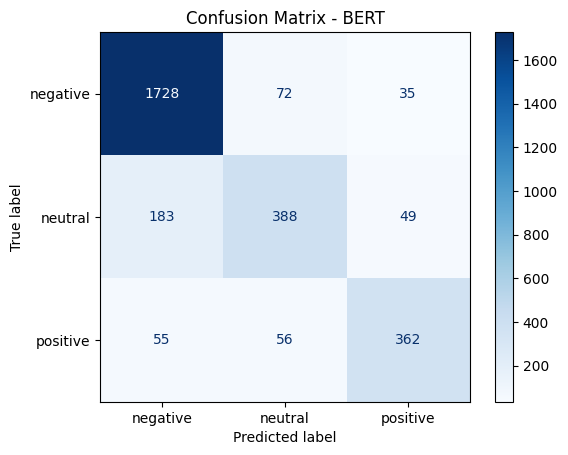

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

preds_output = trainer.predict(test_dataset)
preds = np.argmax(preds_output.predictions, axis=1)

cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_dict.keys())
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - BERT")
plt.show()


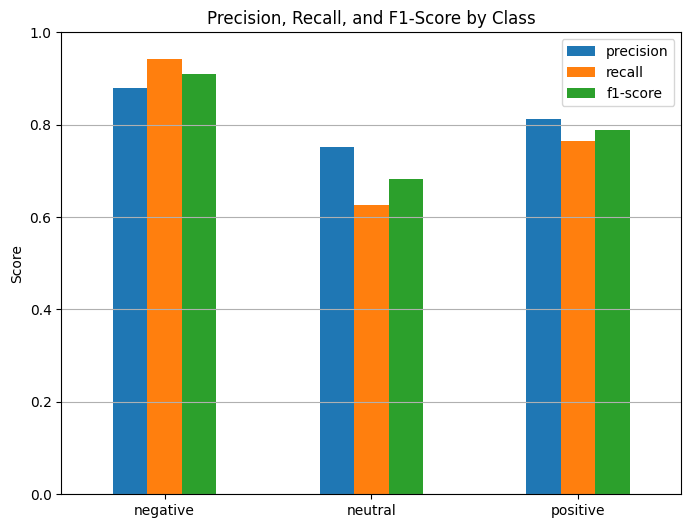

In [20]:
from sklearn.metrics import classification_report

report = classification_report(y_test, preds, target_names=label_dict.keys(), output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_report.iloc[:3][['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(10,8))
plt.title("Precision, Recall, and F1-Score by Class")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


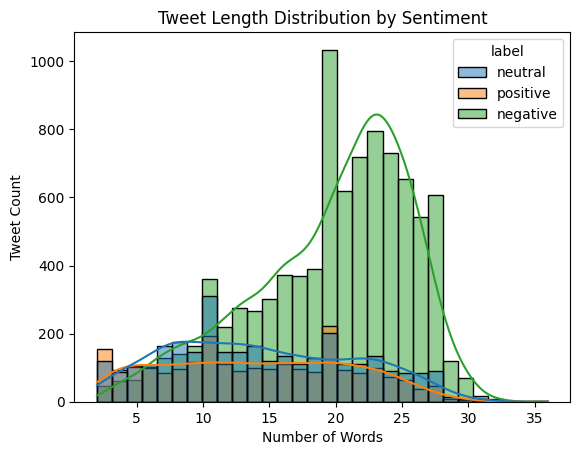

In [21]:
df['length'] = df['tweet'].apply(lambda x: len(x.split()))
sns.histplot(data=df, x='length', hue='label', kde=True, bins=30)
plt.title("Tweet Length Distribution by Sentiment")
plt.xlabel("Number of Words")
plt.ylabel("Tweet Count")
plt.show()


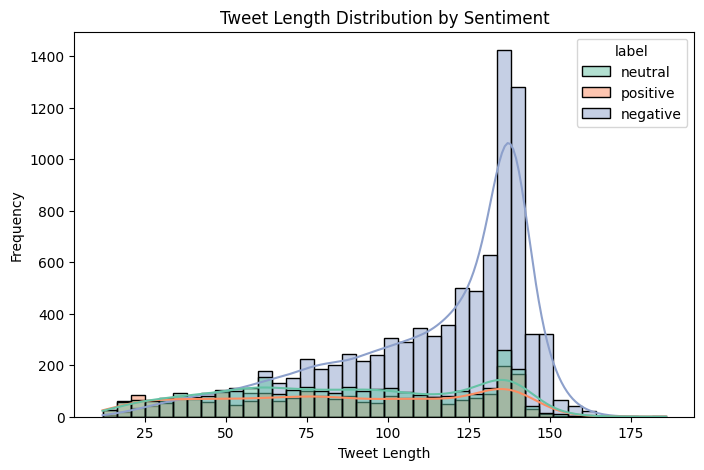

In [22]:
df['tweet_length'] = df['tweet'].apply(len)

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='tweet_length', bins=40, kde=True, hue='label', palette='Set2')
plt.title("Tweet Length Distribution by Sentiment")
plt.xlabel("Tweet Length")
plt.ylabel("Frequency")
plt.show()



<ipython-input-23-ac258e745b76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


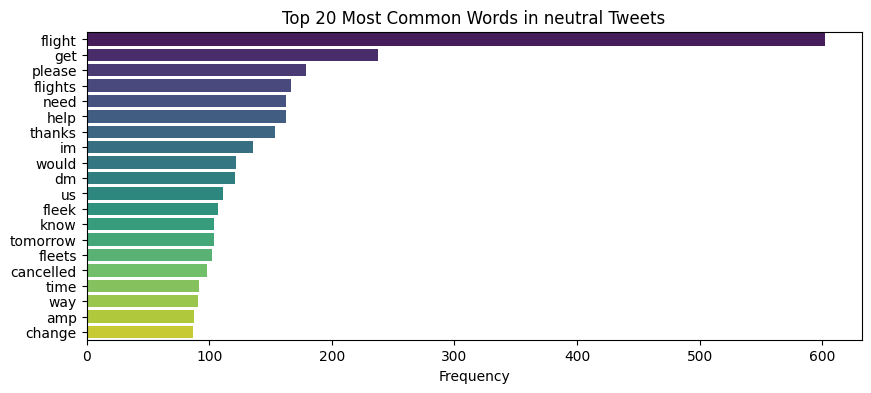

<ipython-input-23-ac258e745b76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


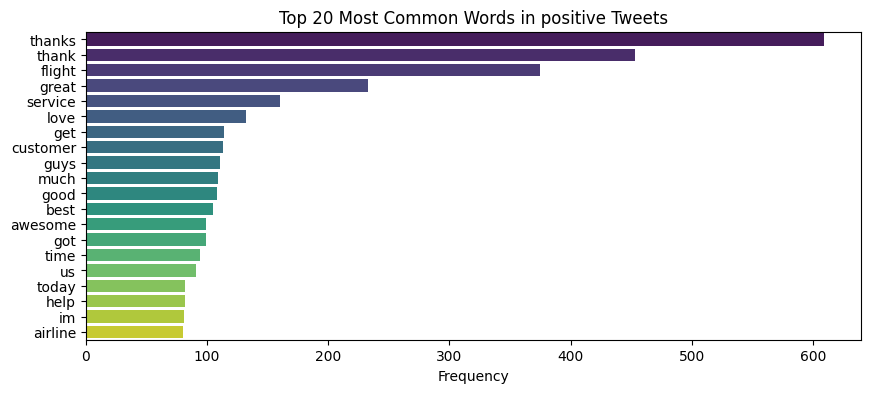

<ipython-input-23-ac258e745b76>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='viridis')


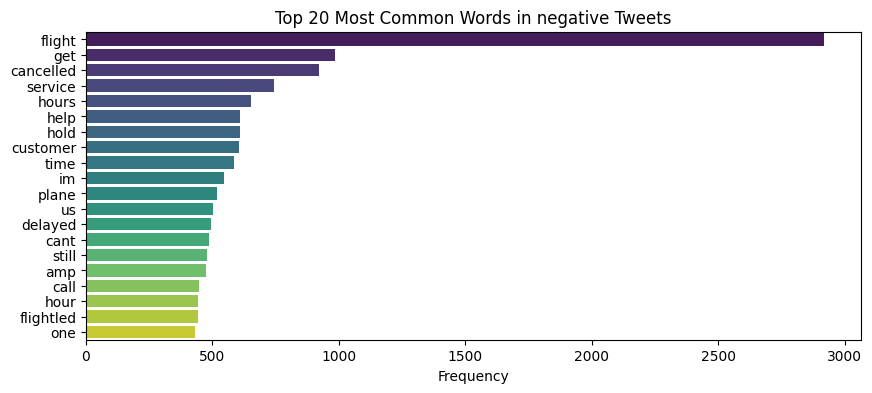

In [23]:
from collections import Counter
#shows most common words and their counts for each sentiment

def plot_common_words(sentiment, n=20):
    words = " ".join(df[df['label'] == sentiment]['clean_tweet']).split()
    common_words = Counter(words).most_common(n)
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f"Top {n} Most Common Words in {sentiment} Tweets")
    plt.xlabel("Frequency")
    plt.show()

for label in df['label'].unique():
    plot_common_words(label)


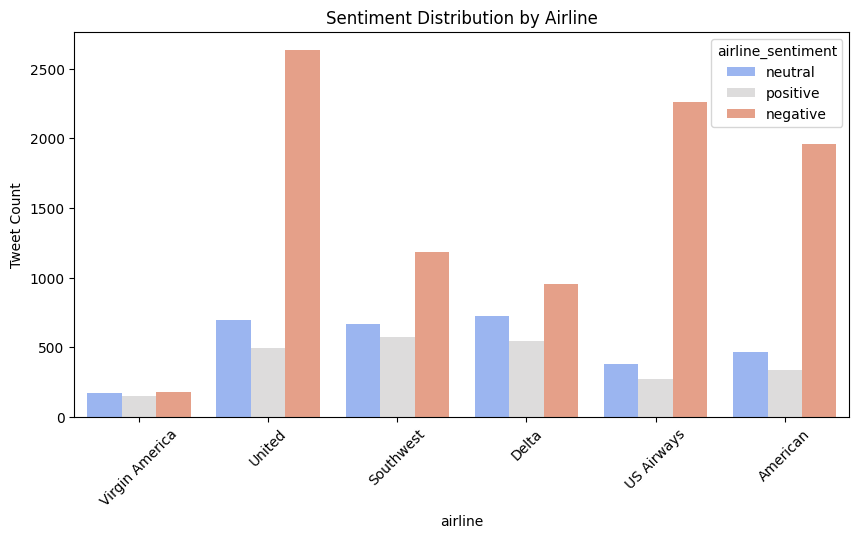

In [24]:
df_airline = pd.read_csv("Tweets.csv") #with all columns
plt.figure(figsize=(10, 5))
sns.countplot(data=df_airline, x='airline', hue='airline_sentiment', palette='coolwarm')
plt.title("Sentiment Distribution by Airline")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.show()


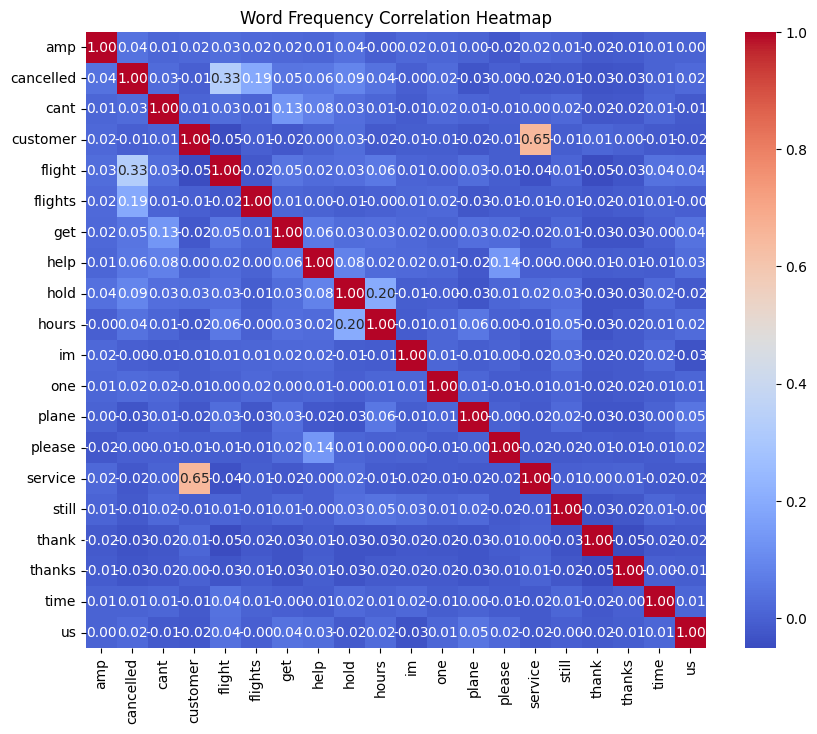

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=20)
X = cv.fit_transform(df['clean_tweet']).toarray()
word_freq_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
correlation = word_freq_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Word Frequency Correlation Heatmap")
plt.show()


-----------------Oversampling-----------------------

In [ ]:
!pip install imbalanced-learn


In [ ]:
'''
#this part should come before training
#didn't change anything yet
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

#I already used the vectorized features so there's no need to apply TF-IDF to the text
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_tweet']).toarray()
y = df['label_id']


X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)

smote = SMOTE(random_state=42)

#oversample the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

#new class distribution
print("Before:", dict(zip(*np.unique(y_train, return_counts=True))))
print("After:", dict(zip(*np.unique(y_train_res, return_counts=True))))

'''


Before SMOTE: {0: 7343, 1: 2479, 2: 1890}
After SMOTE: {0: 7343, 1: 7343, 2: 7343}


In [4]:
!pip install fastapi uvicorn
!pip install pyngrok  #For ngrok to expose the server externally


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.1 MB/s eta 0:00:00


In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
import torch
from transformers import BertTokenizer, BertForSequenceClassification

#tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
#model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

class TextRequest(BaseModel):
    text: str

app = FastAPI() #initialize

#Prediction endpoint
@app.post("/predict")
async def predict_sentiment(request: TextRequest):
    text = request.text


    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    inputs = {key: val.to(device) for key, val in inputs.items()}

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=1)
        predicted_class_id = logits.argmax().item()
        confidence = probs[0][predicted_class_id].item()


    return {"sentiment": class_names[predicted_class_id], "confidence": confidence}



In [ ]:
!pip install nest_asyncio


In [ ]:
from pyngrok import ngrok
import uvicorn
import nest_asyncio
nest_asyncio.apply()

ngrok.set_auth_token("2w8nQ00ZgLi3we4M0xYmyV9L2HV_7eSwwBPXkiNbPeKJJvbn6")



In [ ]:
#ngrok tunnel
public_url = ngrok.connect(8000)
print(f"FastAPI app is accessible at {public_url}")

uvicorn.run(app, host="0.0.0.0", port=8000)


FastAPI app is accessible at NgrokTunnel: "https://5e9a-34-127-7-116.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [19050]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)


INFO:     78.162.20.119:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     78.162.20.119:0 - "POST /predict HTTP/1.1" 200 OK
INFO:     78.162.20.119:0 - "POST /predict HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [19050]


---------------------Trying on browser----------------------------

In [27]:
!pip install fastapi nest_asyncio pyngrok uvicorn


In [28]:
from fastapi import FastAPI
from pydantic import BaseModel
import nest_asyncio
from pyngrok import ngrok
import uvicorn

nest_asyncio.apply()

app = FastAPI()

In [29]:
class TextInput(BaseModel):
  text: str

#Routes
@app.get("/")
def read_root():
  return {"message": "Sentiment analysis API is running!"}

@app.post("/predict/")
def predict_sent(input: TextInput):
    text = input.text
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.nn.functional.softmax(logits, dim=1)
        predicted_class_id = logits.argmax().item()
        confidence = probs[0][predicted_class_id].item()

    return {
        "text": text,
        "predicted_sentiment": class_names[predicted_class_id],
        "confidence": round(confidence, 4)
    }



In [31]:
!ngrok config add-authtoken "2w8nQ00ZgLi3we4M0xYmyV9L2HV_7eSwwBPXkiNbPeKJJvbn6"


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [32]:
#Opens a public tunnel with ngrok
public_url = ngrok.connect(8000)
print("Public URL:", public_url)

uvicorn.run(app, host="0.0.0.0", port=8000)


Public URL: NgrokTunnel: "https://b5ac-34-124-148-38.ngrok-free.app" -> "http://localhost:8000"


INFO:     Started server process [3529]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://0.0.0.0:8000 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [3529]
